# Naive Bayes Classifier (Generative Learning Model):

It is a classification technique based on $ Bayes’ Theorem$ with an assumption of independence among predictors. 
<br/>
In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability. 
<br/>
<br/>Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. There are three types of Naive Bayes model under the Scikit learn library:
<ol>
    <li> Gaussian: It is used in classification and it assumes that features follow a normal distribution.</li>
    <li> Multinomial: It is used for discrete counts. For example, let’s say, we have a text classification problem. 
        <br/>Here we can consider Bernoulli trials which is one-step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.</li>
    <li> Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.</li>
</ol>

###### 1. import the necessary libraries

In [1]:
import pandas as pd # for reading the file, manipulation and analysis in dataframe
import numpy as np # provide mathamtical functions
import seaborn as sns # interative Graphs 
import warnings # for ignoring the warnings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot # for ploting pyplot
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
warnings.warn('my warning')

###### 2. Read the dataset

In [2]:
db_data=pd.read_csv('diabetes.csv')
db_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# shape of the dataset
db_data.shape

(768, 9)

###### 3. Analysis the Dataset

In [4]:
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check for the Null column values in the dataset
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
db_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

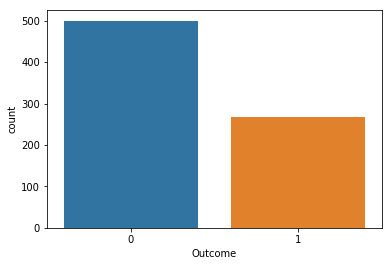

In [7]:
# check for the positive and negative labels.
sns.countplot(x="Outcome",data=db_data)

###### 4. Preprocess the Dataset (Dataset splitting for training and testing)

In [8]:
X=db_data.drop(['Outcome'],axis=1) 
y=db_data['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###### 5. A: Creating the Gaussian Naive Bayes model

In [10]:
from sklearn import naive_bayes
gnb=naive_bayes.GaussianNB()

In [11]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
y_pred=gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

###### 6 A: Validate the Accuracy of the model

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

AUC: 0.72529


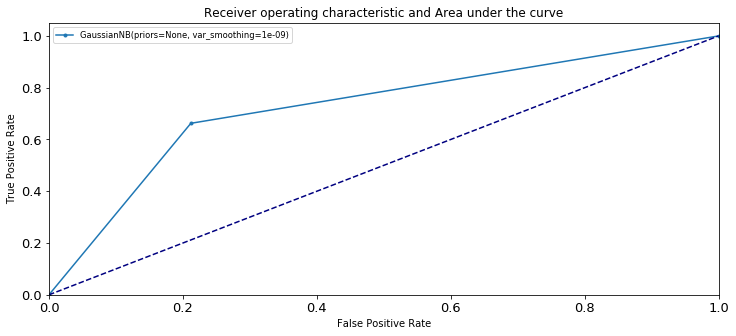

In [14]:
plt.subplots(figsize=(12,5)) 
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.5f' % auc)
plt.plot(fpr, tpr,marker='.',label=gnb)
# plot no skill
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
 # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve', fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
plt.show()

###### 5.B: Creating the Multinomial Naive Bayes model

MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice)

In [15]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [16]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
y_pred=mnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6190476190476191

###### 6 B: Validate the Accuracy of the model

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

AUC: 0.58812


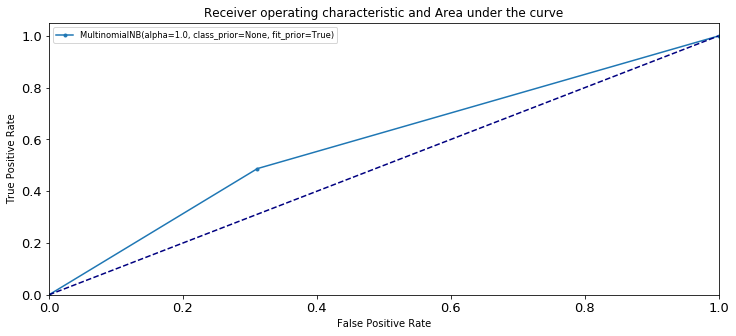

In [19]:
plt.subplots(figsize=(12,5)) 
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.5f' % auc)
plt.plot(fpr, tpr,marker='.',label=mnb)
# plot no skill
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
 # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve', fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
plt.show()

###### 5.C: Creating the Bernoulli Naive Bayes model

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [21]:
bnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [22]:
y_pred=bnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6536796536796536

###### 6 C: Validate the Accuracy of the model

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

AUC: 0.50000


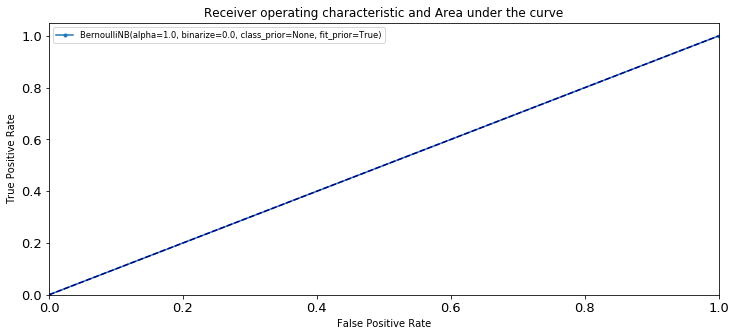

In [24]:
plt.subplots(figsize=(12,5)) 
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.5f' % auc)
plt.plot(fpr, tpr,marker='.',label=bnb)
# plot no skill
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
 # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve', fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
plt.show()